In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Load the data
data = pd.read_csv('C:\\Users\\user\\Downloads\\usage_data.csv')

In [15]:
print(data.head())  
print(data.info())  
print(data.describe())  

         Date Username        Feature  Sessions  Time spent  \
0  01/06/2017  kwalter      Reporting        14        23.0   
1  01/06/2017    kcarr        Roadmap        17        55.0   
2  01/06/2017  cstuart     Automation        13         2.0   
3  01/06/2017  mkelley  Task Creation        14        18.0   
4  02/06/2017  edillon  Task Creation        17        13.0   

   Average time spent  
0            1.642857  
1            3.235294  
2            0.153846  
3            1.285714  
4            0.764706  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10575 entries, 0 to 10574
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10575 non-null  object 
 1   Username            10575 non-null  object 
 2   Feature             10575 non-null  object 
 3   Sessions            10575 non-null  int64  
 4   Time spent          10575 non-null  float64
 5   Average time spent  1

In [21]:
import pandas as pd

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract 'Year' and 'Month' from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Filter for January 2023
january_2023 = data[(data['Year'] == 2023) & (data['Month'] == 1)]

# View the result
print(january_2023)


            Date  Username            Feature  Sessions  Time spent  \
10412 2023-01-01   rconway          Reporting        16        34.0   
10413 2023-01-01  agardner      Saga Creation        17        27.0   
10414 2023-01-01    shorne         Automation        13         9.0   
10415 2023-01-01   aosborn            Roadmap        14        27.0   
10416 2023-01-01   zhodges  Account Managment        15        13.0   

       Average time spent    Year  Month  
10412            2.125000  2023.0    1.0  
10413            1.588235  2023.0    1.0  
10414            0.692308  2023.0    1.0  
10415            1.928571  2023.0    1.0  
10416            0.866667  2023.0    1.0  


In [23]:
total_time_spent = january_2023['Time spent'].sum()
print(f"Total time spent in January 2023: {total_time_spent} minutes")

Total time spent in January 2023: 110.0 minutes


In [25]:
daily_usage = january_2023.groupby('Date')['Time spent'].sum()
print(daily_usage)

Date
2023-01-01    110.0
Name: Time spent, dtype: float64


In [27]:
monthly_usage = data.groupby(['Year', 'Month'])['Time spent'].sum().reset_index()

# Calculate the change compared to December 2022
december_2022 = monthly_usage[(monthly_usage['Year'] == 2022) & (monthly_usage['Month'] == 12)]['Time spent'].values[0]
january_2023_total = monthly_usage[(monthly_usage['Year'] == 2023) & (monthly_usage['Month'] == 1)]['Time spent'].values[0]
difference = january_2023_total - december_2022
print(f"Change from December 2022 to January 2023: {difference} minutes")

Change from December 2022 to January 2023: -1225.0 minutes


In [29]:
feature_usage = january_2023.groupby('Feature')['Time spent'].sum().sort_values(ascending=False)
print(feature_usage)

Feature
Reporting            34.0
Roadmap              27.0
Saga Creation        27.0
Account Managment    13.0
Automation            9.0
Name: Time spent, dtype: float64


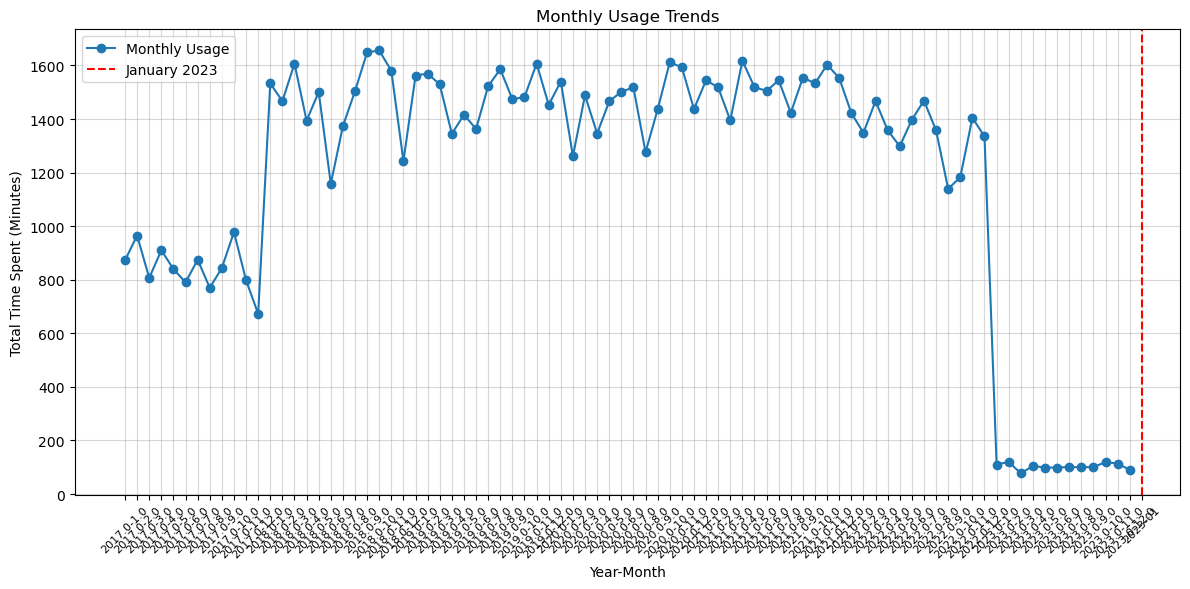

In [33]:
import matplotlib.pyplot as plt

# Create a 'Year-Month' column
monthly_usage['Year-Month'] = monthly_usage['Year'].astype(str) + '-' + monthly_usage['Month'].astype(str).str.zfill(2)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage['Year-Month'], monthly_usage['Time spent'], marker='o', label='Monthly Usage')
plt.axvline(x='2023-01', color='r', linestyle='--', label='January 2023')
plt.xticks(rotation=45, fontsize=8)
plt.title('Monthly Usage Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Time Spent (Minutes)')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

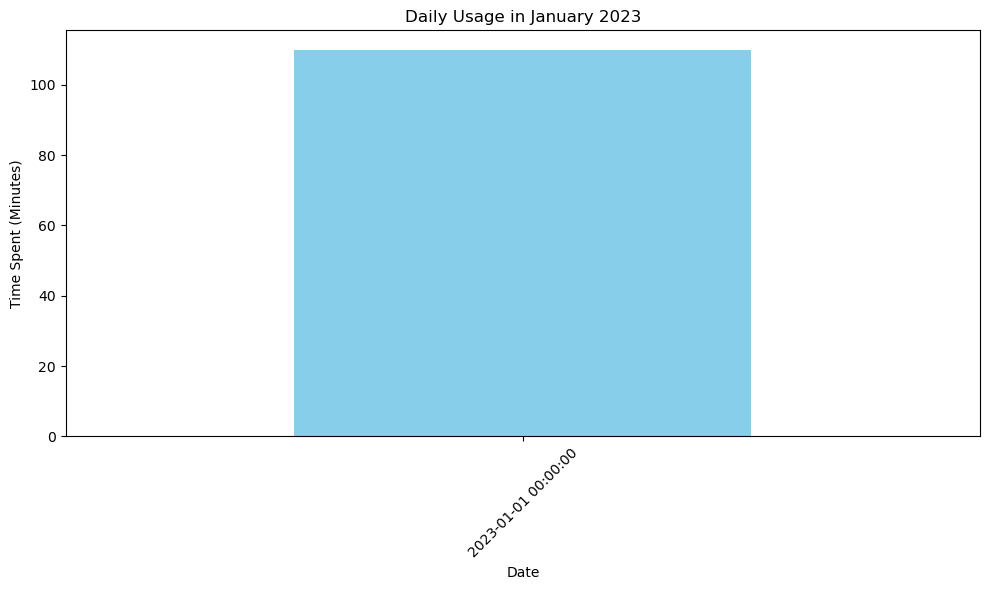

In [35]:
daily_usage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Daily Usage in January 2023')
plt.xlabel('Date')
plt.ylabel('Time Spent (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

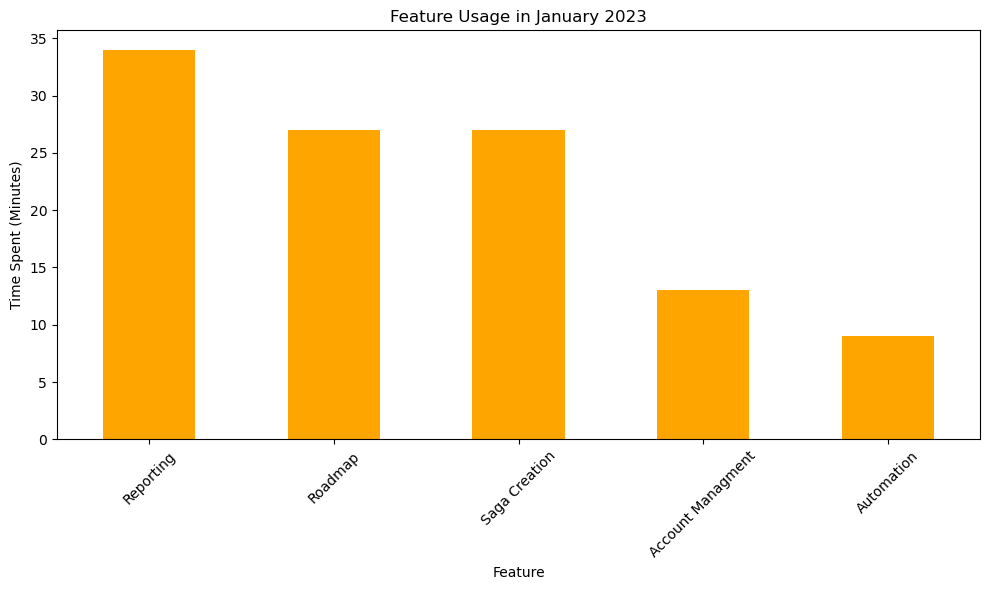

In [37]:
feature_usage.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Feature Usage in January 2023')
plt.xlabel('Feature')
plt.ylabel('Time Spent (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()